# 모델 마다 다른 파라미터를 이용하여 어느 파라미터가 가장 영향력 있나 확인

# 라이브러리, 데이터 셋 로드

In [454]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [455]:
iris_data = load_iris()

In [456]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

# make train, test set  

In [457]:
# 학습 feature
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [458]:
# 학습 feature
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
# 맞춰야할 정답
y = pd.DataFrame(iris_data.target, columns=["class"])

In [569]:
# 다음엔 더 큰 데이터로 해보자
X.shape

(150, 4)

In [460]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [461]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


## 8 : 2 = train : test 

In [488]:
# train_set : test_set = 8 : 2 로 설정
# random_state 설정으로 data들을 고정 시켰는데 아래 성공율이 계속 바뀌는 이유?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 

# 모델에 학습

## 기본 모델 : Parameter 설정 X

In [489]:
model = DecisionTreeClassifier()

In [490]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [491]:
y_predict = model.predict(X_test)
y_predict

array([1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [492]:
model.score(X_test, y_test)

0.9

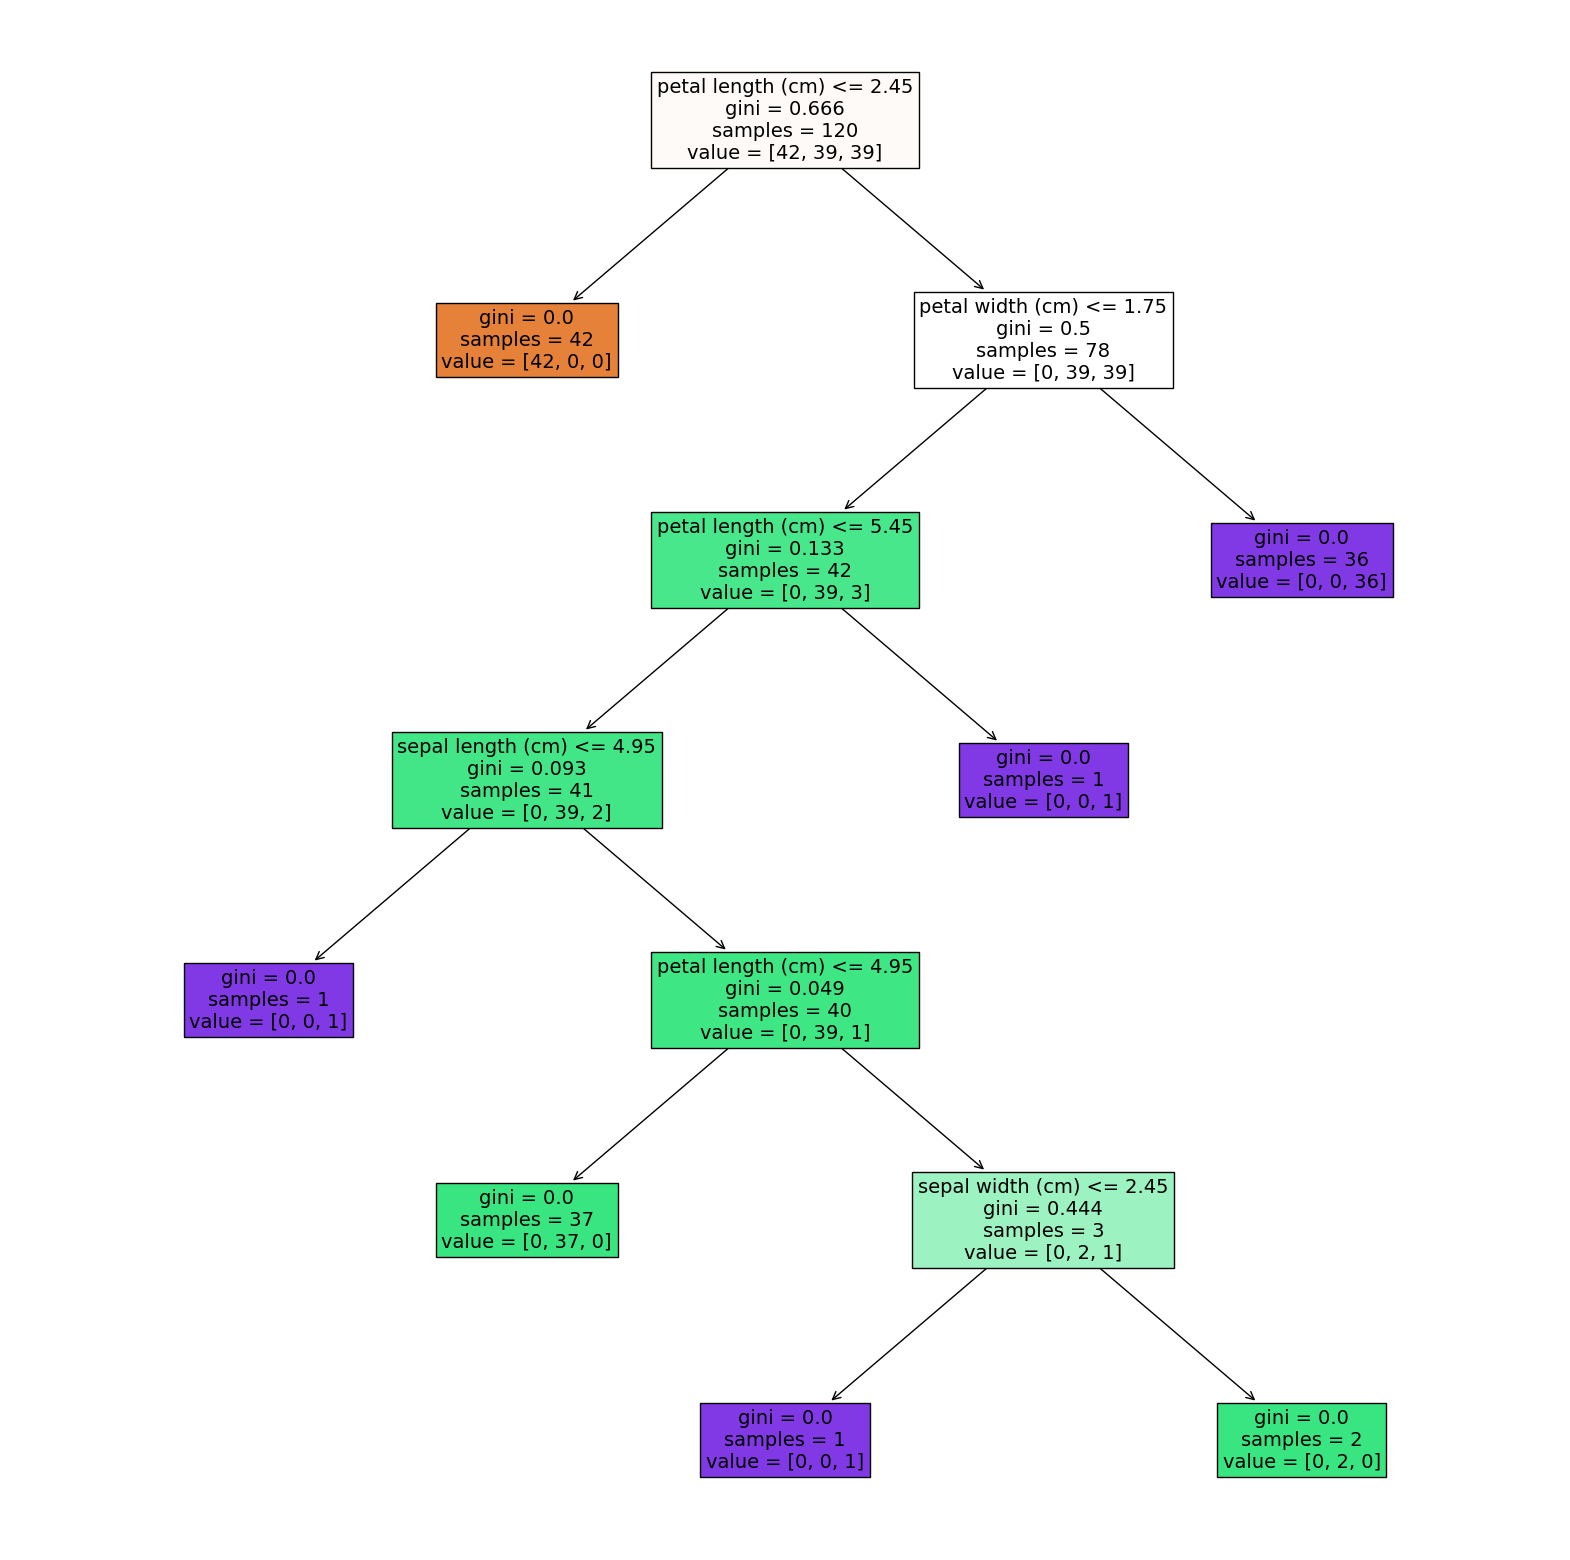

In [493]:
plt.figure(figsize=(20, 20))
plot_tree(model, feature_names=iris_data.feature_names, filled=True, fontsize=14)
plt.show()

## max_depth 설정

In [494]:
model = DecisionTreeClassifier(max_depth = 3)

In [495]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [496]:
y_predict = model.predict(X_test)
y_predict

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [497]:
model.score(X_test, y_test)

0.9333333333333333

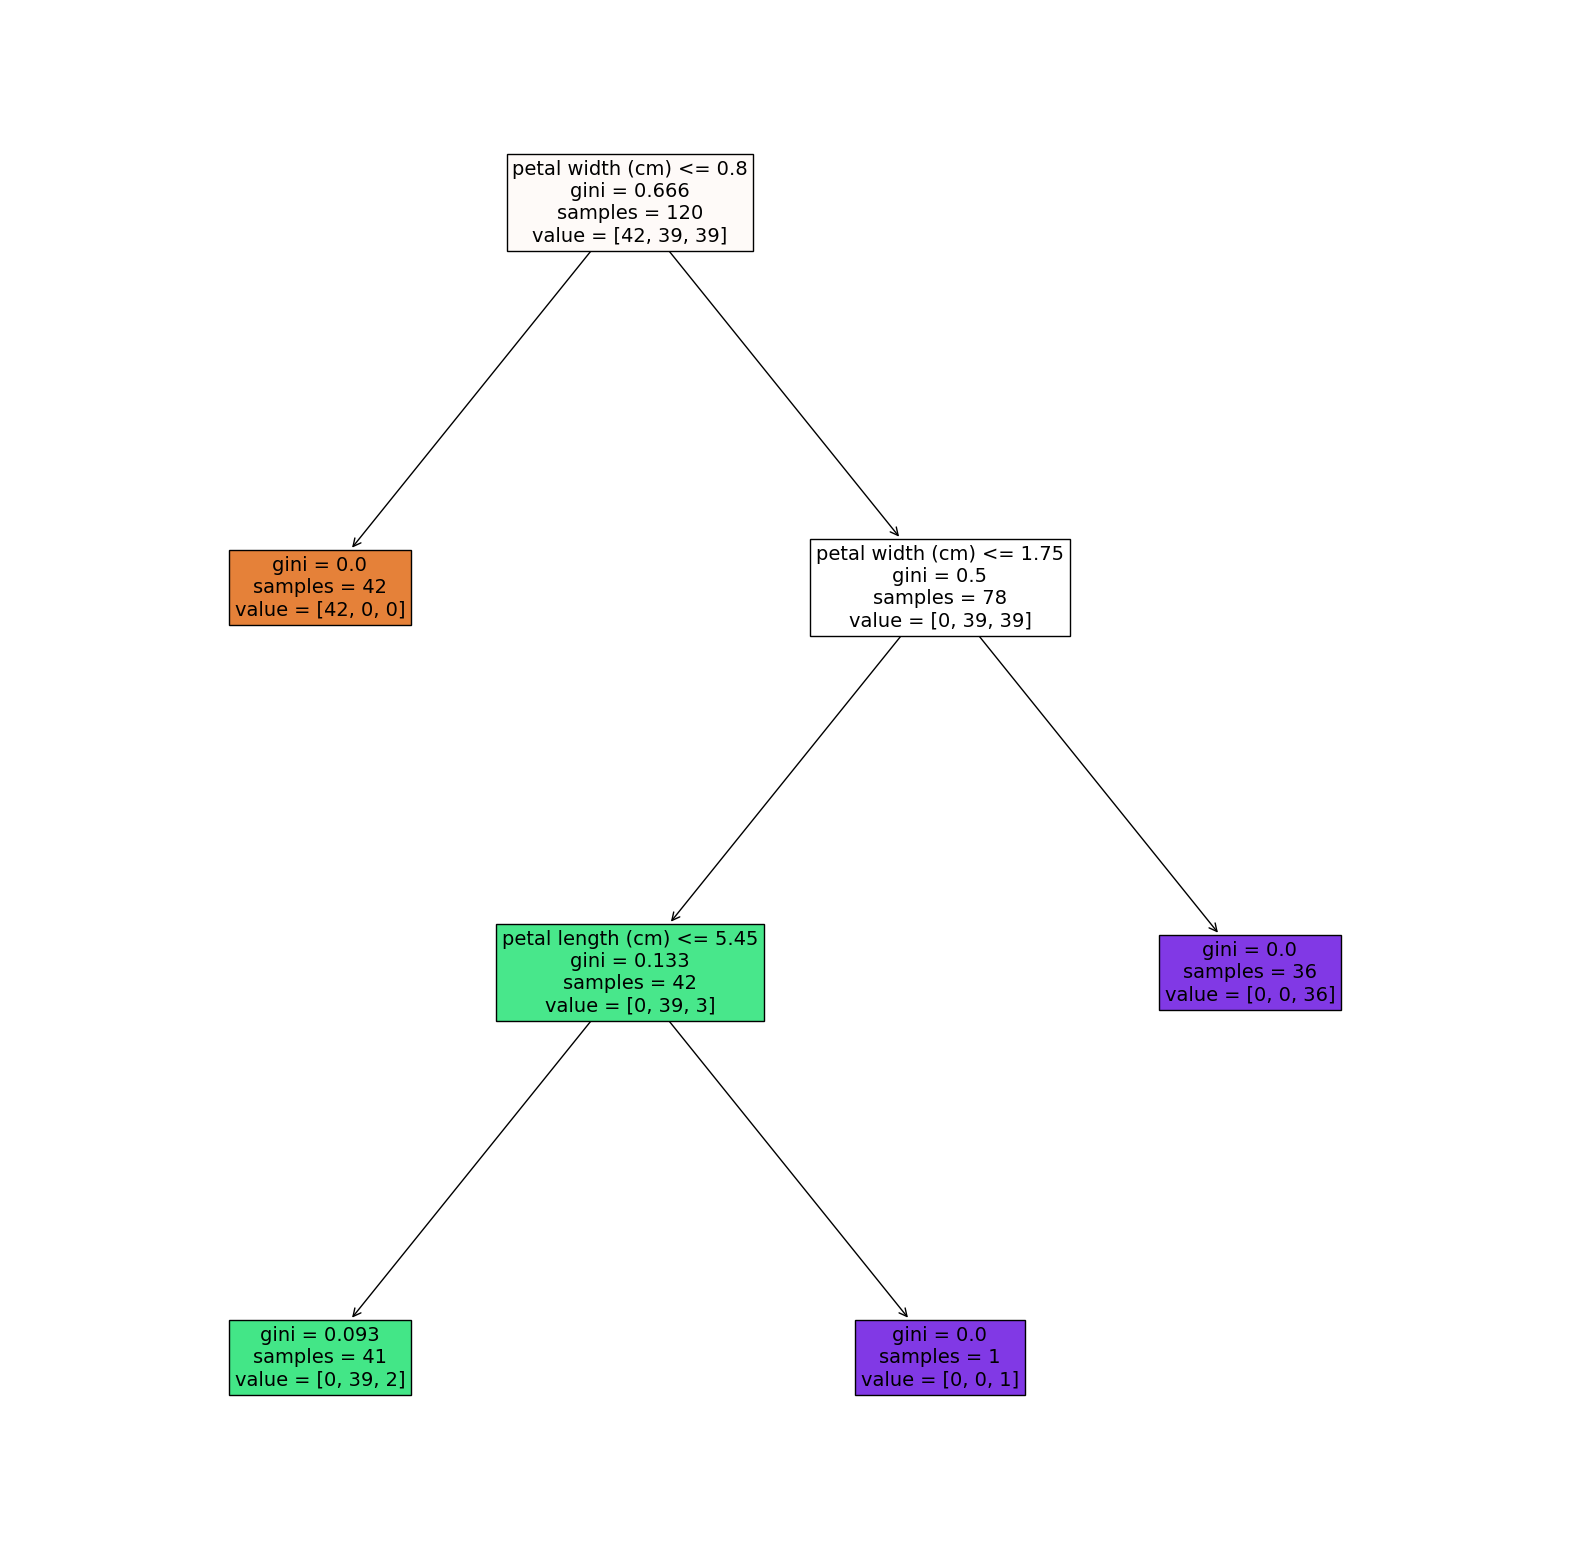

In [498]:
plt.figure(figsize=(20, 20))
plot_tree(model, feature_names=iris_data.feature_names, filled=True, fontsize=14)
plt.show()

## min_samples_leaf 설정

In [564]:
model = DecisionTreeClassifier(min_samples_leaf=5)

In [565]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5)

In [566]:
y_predict = model.predict(X_test)
y_predict

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [567]:
model.score(X_test, y_test)

0.9

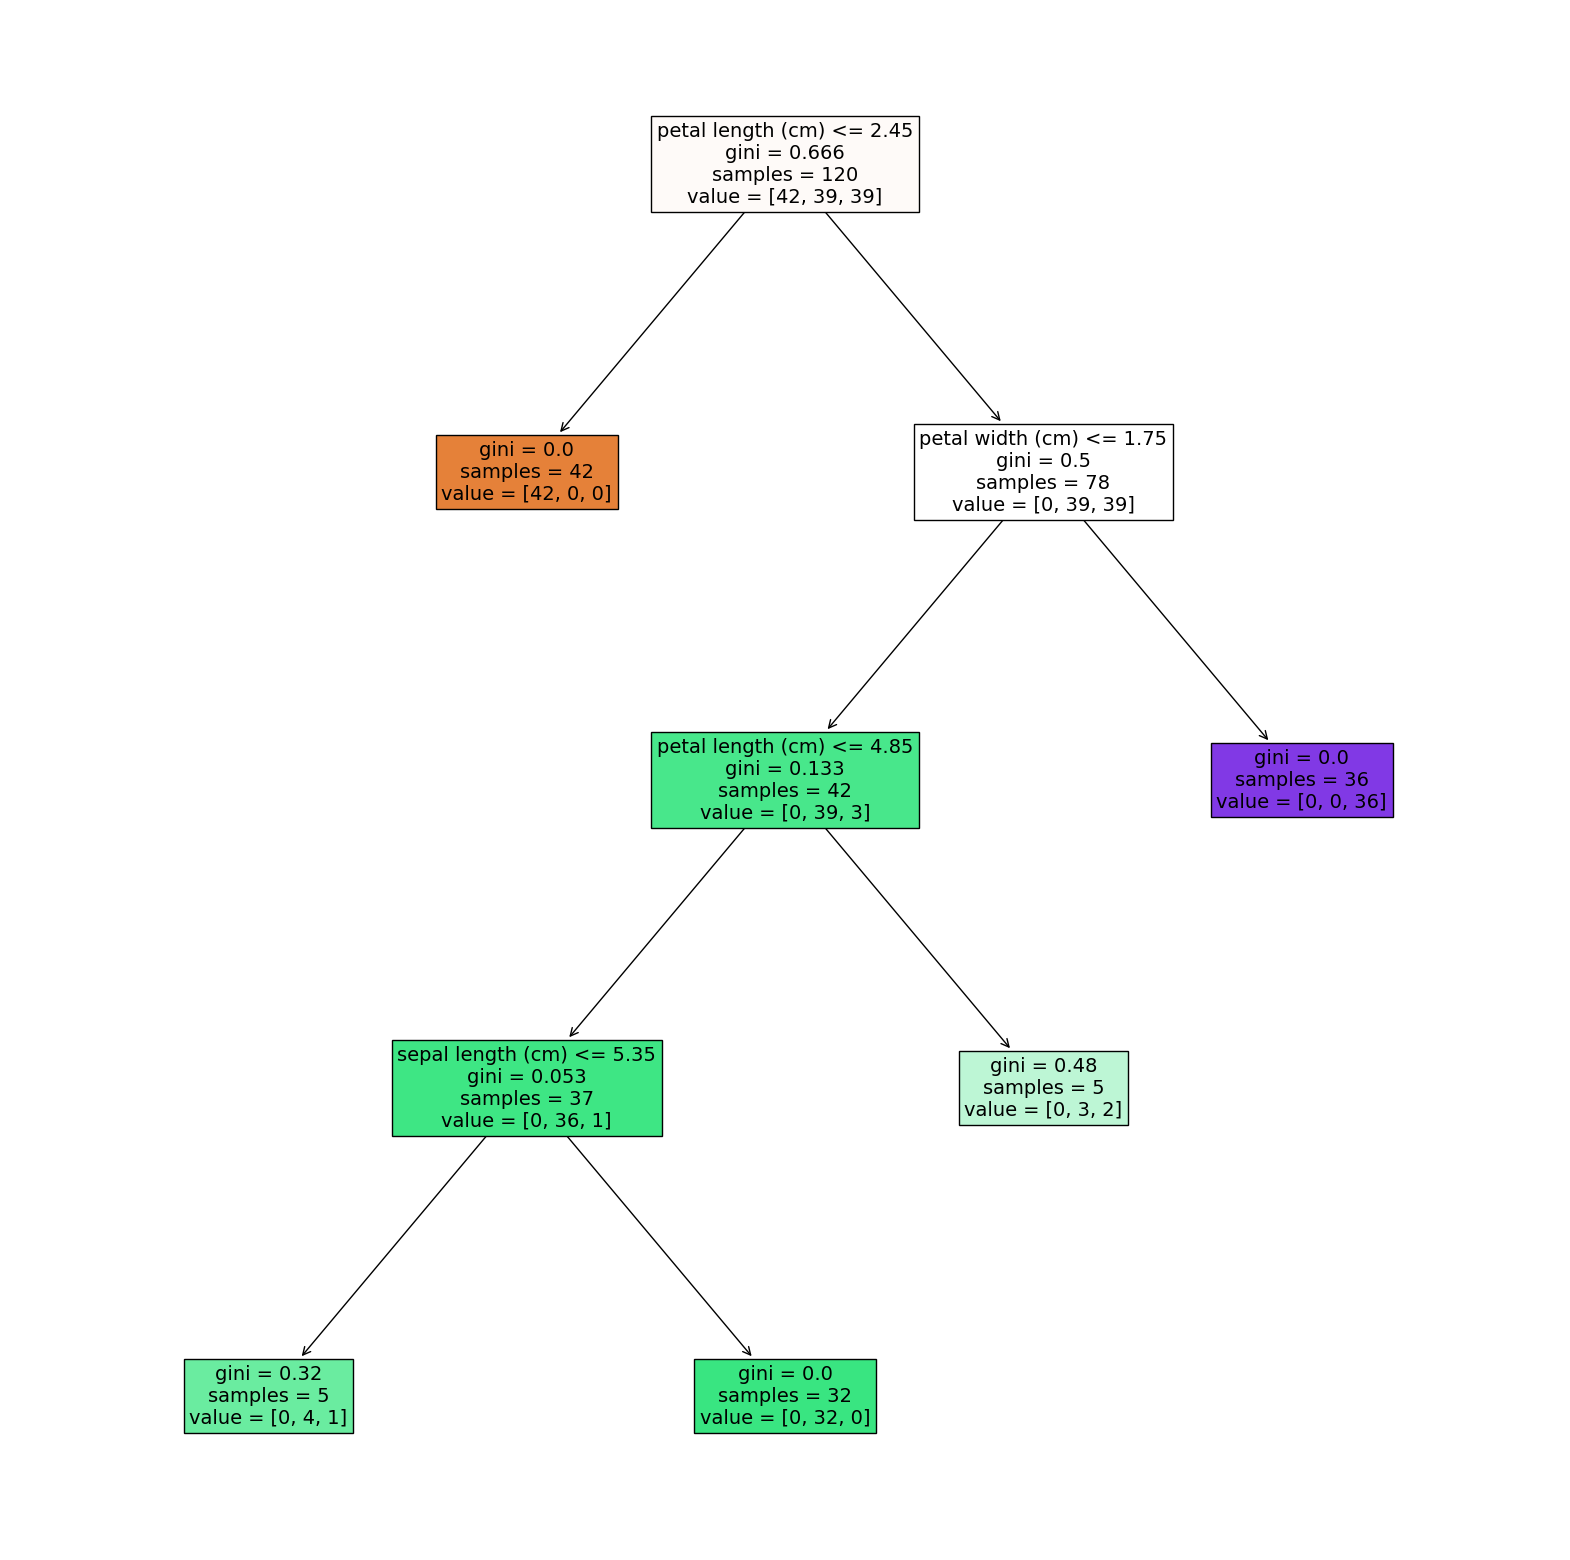

In [568]:
plt.figure(figsize=(20, 20))
plot_tree(model, feature_names=iris_data.feature_names, filled=True, fontsize=14)
plt.show()

## max_features 설정

In [544]:
model = DecisionTreeClassifier(max_features=0.7)

In [545]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_features=0.7)

In [546]:
y_predict = model.predict(X_test)
y_predict

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [547]:
model.score(X_test, y_test)

0.9666666666666667

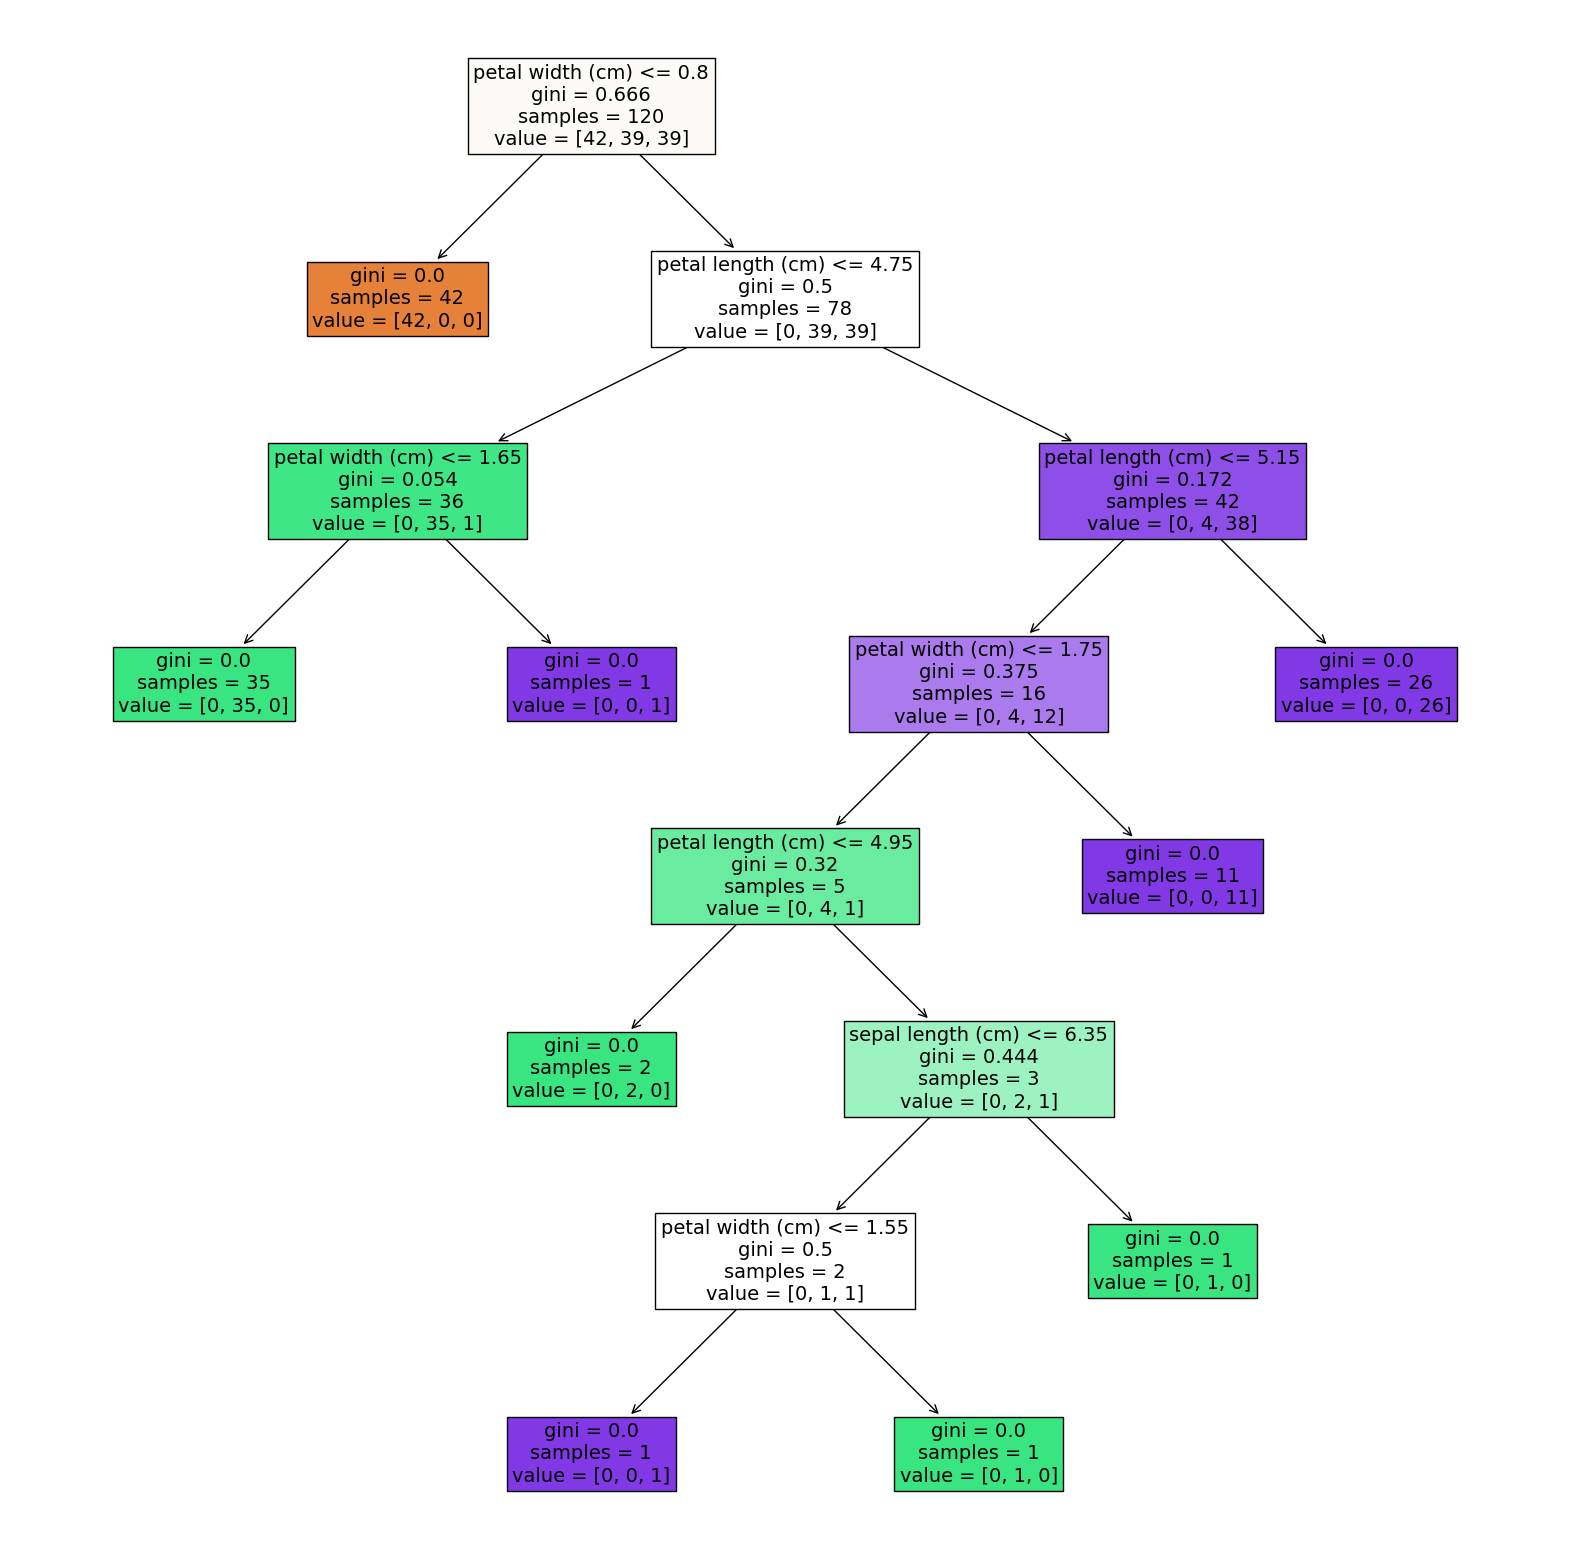

In [548]:
plt.figure(figsize=(20, 20))
plot_tree(model, feature_names=iris_data.feature_names, filled=True, fontsize=14)
plt.show()

## max_leaf_nodes 설정

In [519]:
model = DecisionTreeClassifier(max_leaf_nodes=10)

In [520]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

In [521]:
y_predict = model.predict(X_test)
y_predict

array([1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [522]:
model.score(X_test, y_test)

0.9333333333333333

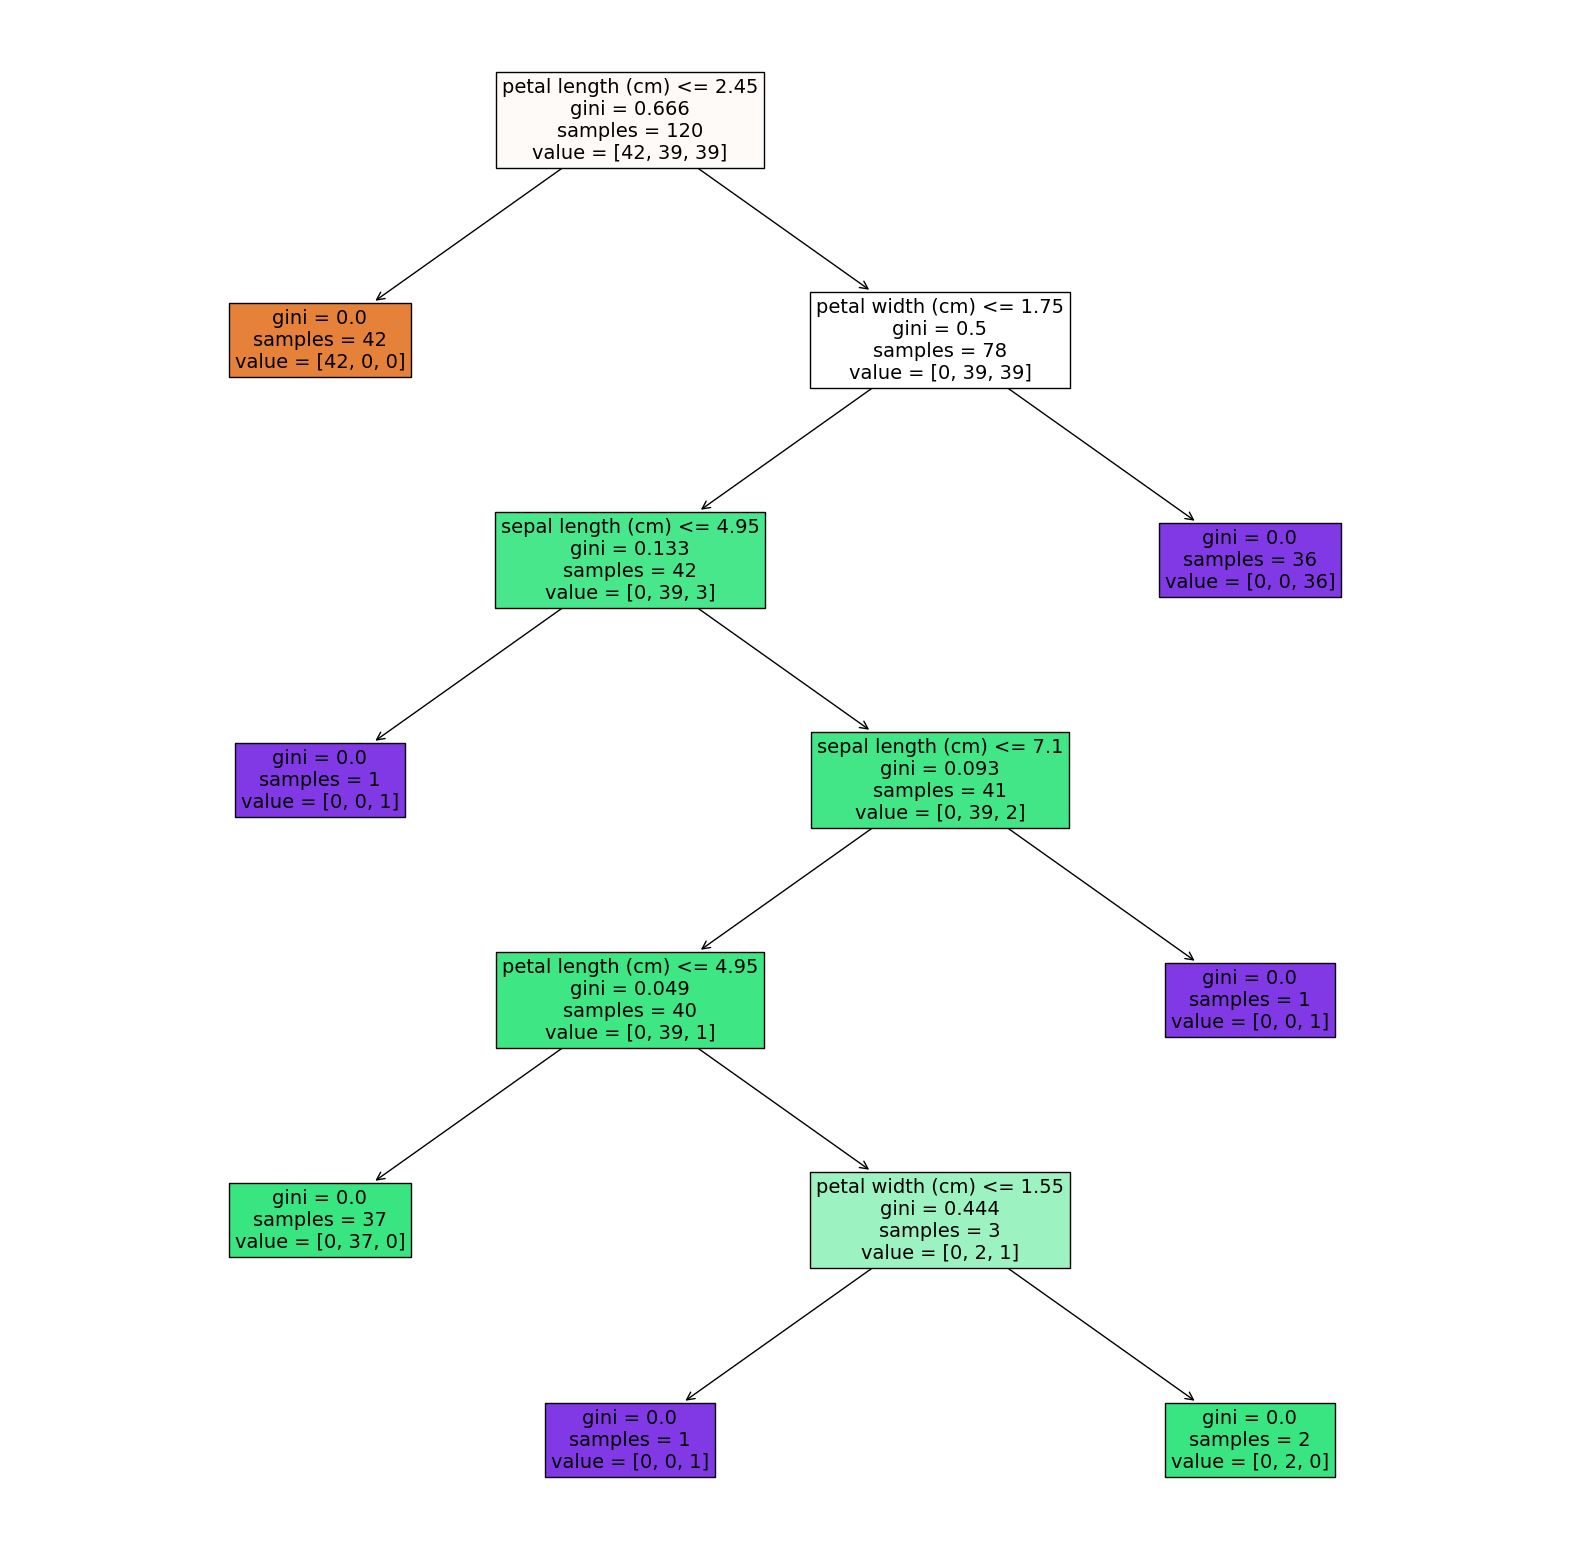

In [523]:
plt.figure(figsize=(20, 20))
plot_tree(model, feature_names=iris_data.feature_names, filled=True, fontsize=14)
plt.show()